In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cross_validation import KFold   
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline 

In [86]:
# Training Data
df = pd.read_csv("train.csv")

In [87]:
# Column headers 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [88]:
# Summary of numerical fields 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


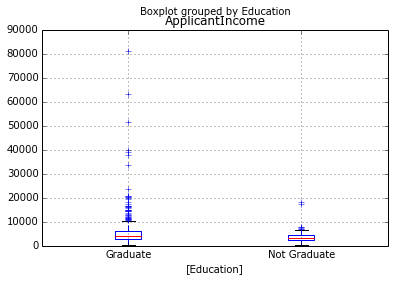

In [89]:
df.boxplot(column='ApplicantIncome', by = 'Education')

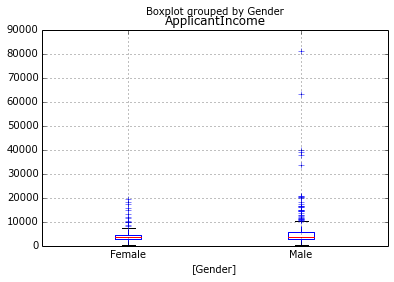

In [90]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

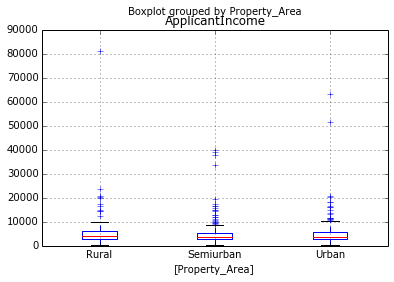

In [91]:
df.boxplot(column='ApplicantIncome', by = 'Property_Area')

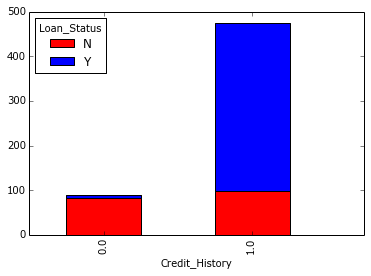

In [92]:
credit_history_loan_status = pd.crosstab(df['Credit_History'], df['Loan_Status'])
credit_history_loan_status.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

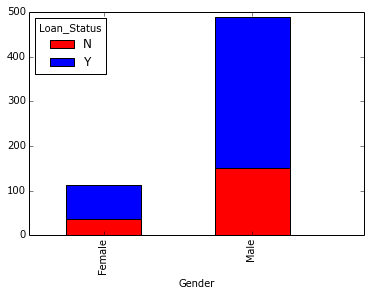

In [93]:
credit_history_loan_status = pd.crosstab(df['Gender'], df['Loan_Status'])
credit_history_loan_status.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [94]:
# Missing values
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
# Fill missing values
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Credit_History'].fillna(0,inplace=True)

In [98]:
# Encoding
from sklearn.preprocessing import LabelEncoder
fields = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in fields:
    df[i] = le.fit_transform(df[i])


In [99]:
def predict_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))
  model.fit(data[predictors],data[outcome]) 


In [100]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
predict_model(model, df,predictor_var,outcome_var)



Accuracy : 77.036%
Cross-Validation Score : 77.041%


In [101]:
predictor_var = ['Credit_History','Loan_Amount_Term']
predict_model(model, df,predictor_var,outcome_var)

Accuracy : 77.036%
Cross-Validation Score : 77.205%


In [102]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
predict_model(model, df,predictor_var,outcome_var)

Accuracy : 86.156%
Cross-Validation Score : 73.131%
